In [17]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from stable_baselines3 import DQN

In [19]:
model = DQN.load('../best_model/dqn/MlpPolicy/best_model.zip')
# model = DQN.load('../output_models/dqn/MlpPolicy/2022-06-06_21_48_53_32.zip')
dqn_net = model.q_net
# model.load_replay_buffer("../best_model/dqn/MlpPolicy/best_model_rb")
# X = model.replay_buffer.observations
# X = torch.Tensor(X)

In [20]:
X = np.load('../best_model/dqn/MlpPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([6633, 1, 7])

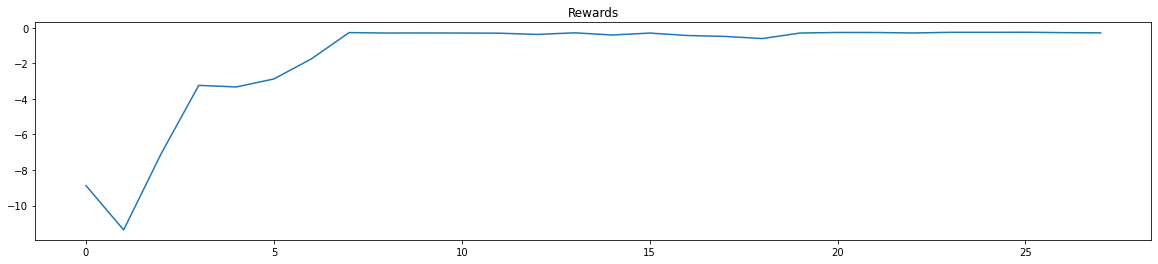

In [22]:
plot_rewards("../best_model/dqn/MlpPolicy/best_model_rewards.csv")

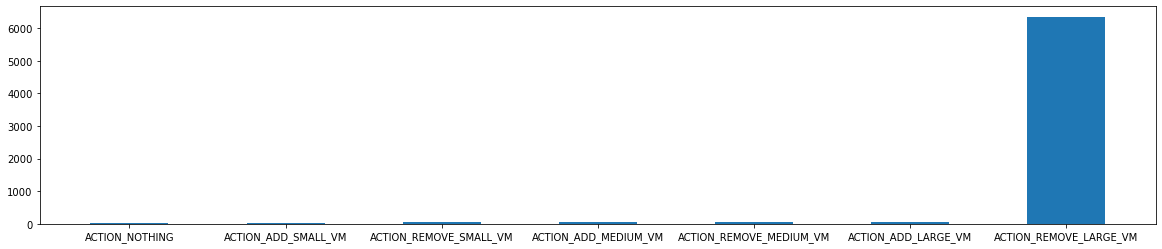

In [23]:
plot_action_histogram(model, X)

In [34]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
ig_attributor = IGAttributor(net=dqn_net,
                             agent='dqn',
                             policy='mlp',
                             data=X_sample)
mean_attributions = ig_attributor.get_mean_attributions()


torch.Size([500, 1, 7])


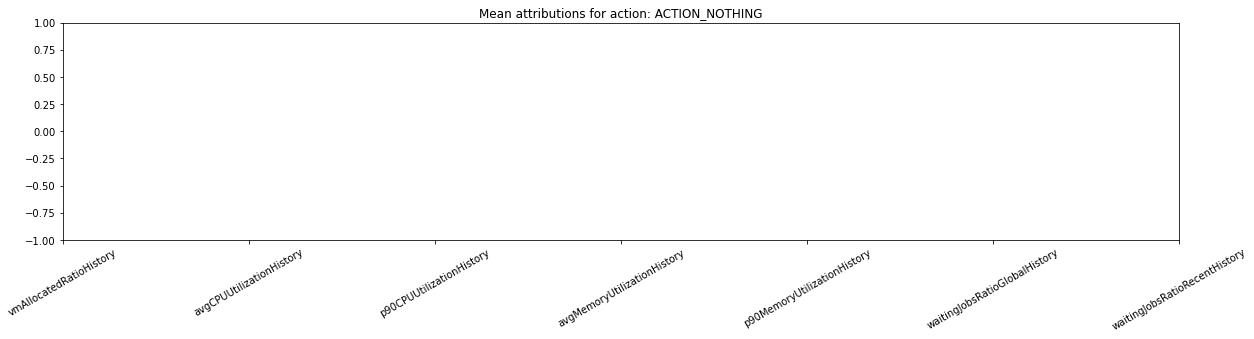

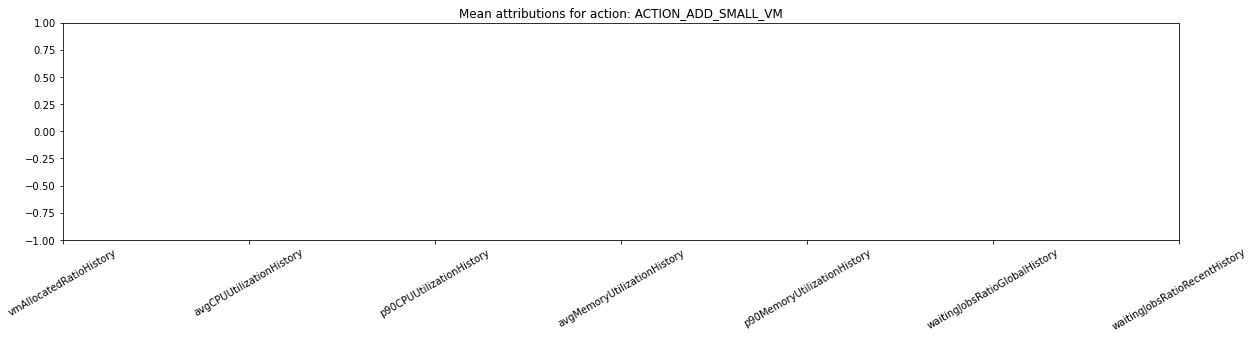

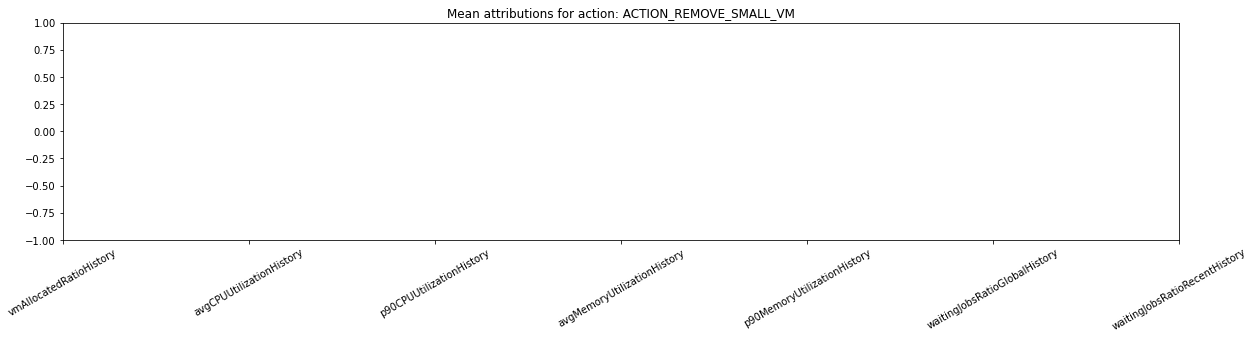

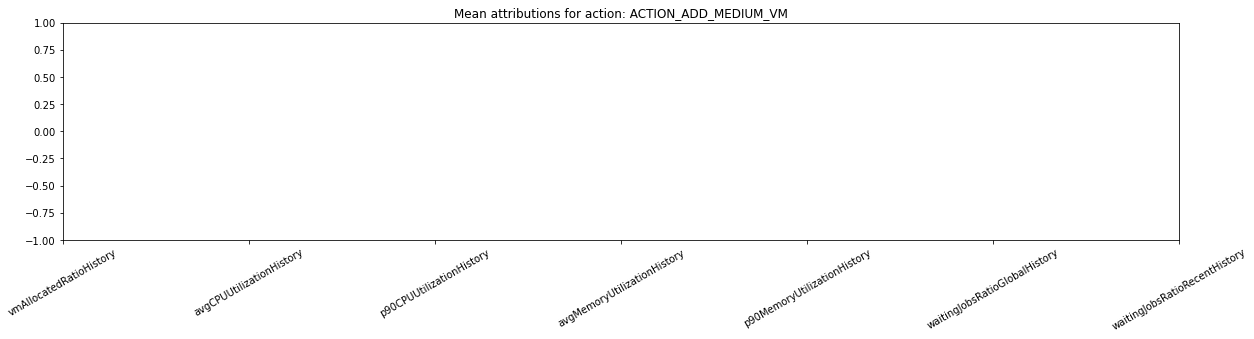

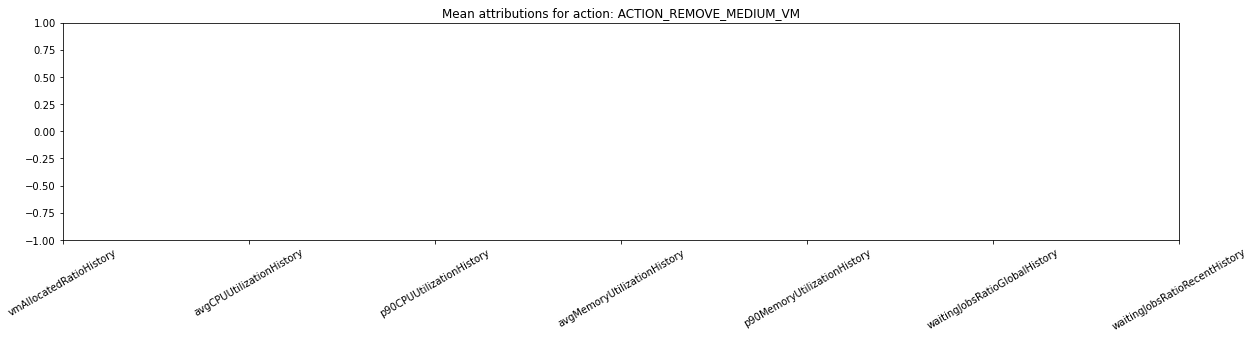

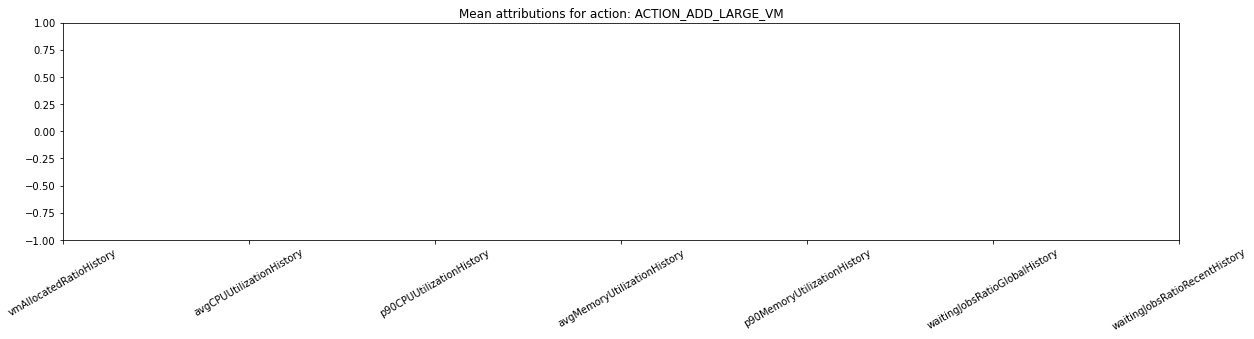

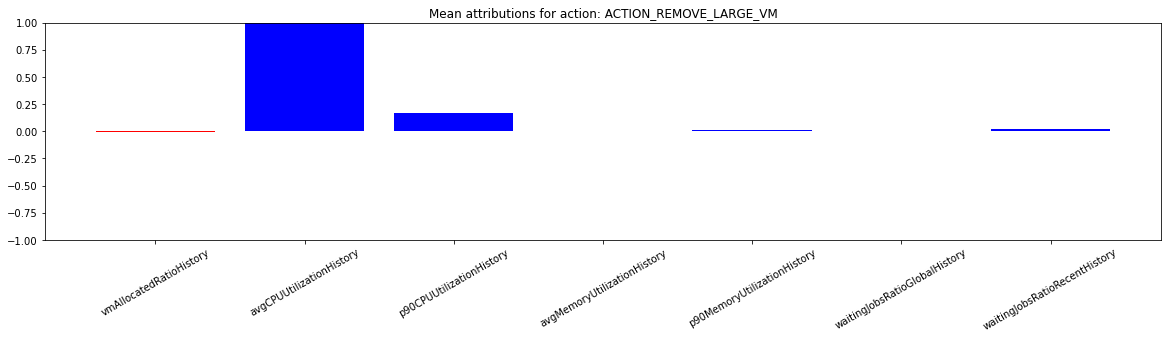

In [35]:
plot_mean_attributions(mean_attributions=mean_attributions)

Action made: ACTION_REMOVE_LARGE_VM
Q-values:
ACTION_NOTHING: -0.25087738037109375
ACTION_ADD_SMALL_VM: -0.2544344663619995
ACTION_REMOVE_SMALL_VM: -0.2543143630027771
ACTION_ADD_MEDIUM_VM: -0.26140838861465454
ACTION_REMOVE_MEDIUM_VM: -0.24827711284160614
ACTION_ADD_LARGE_VM: -0.26564210653305054
ACTION_REMOVE_LARGE_VM: -0.2455867975950241


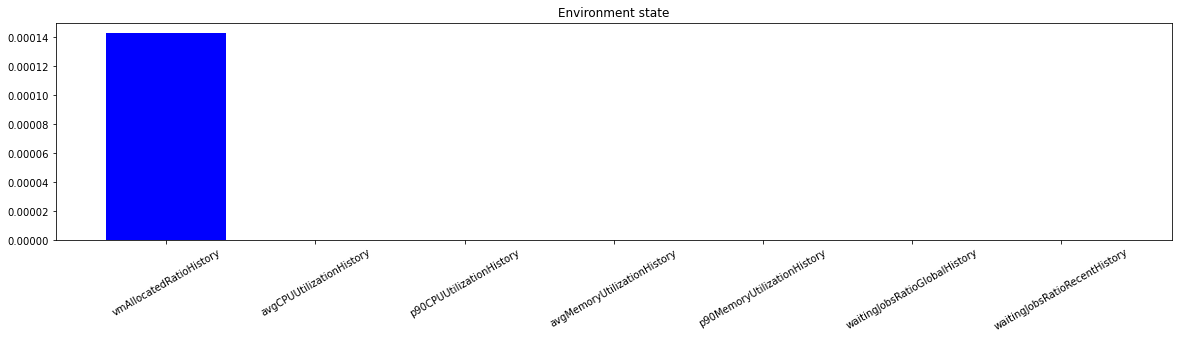

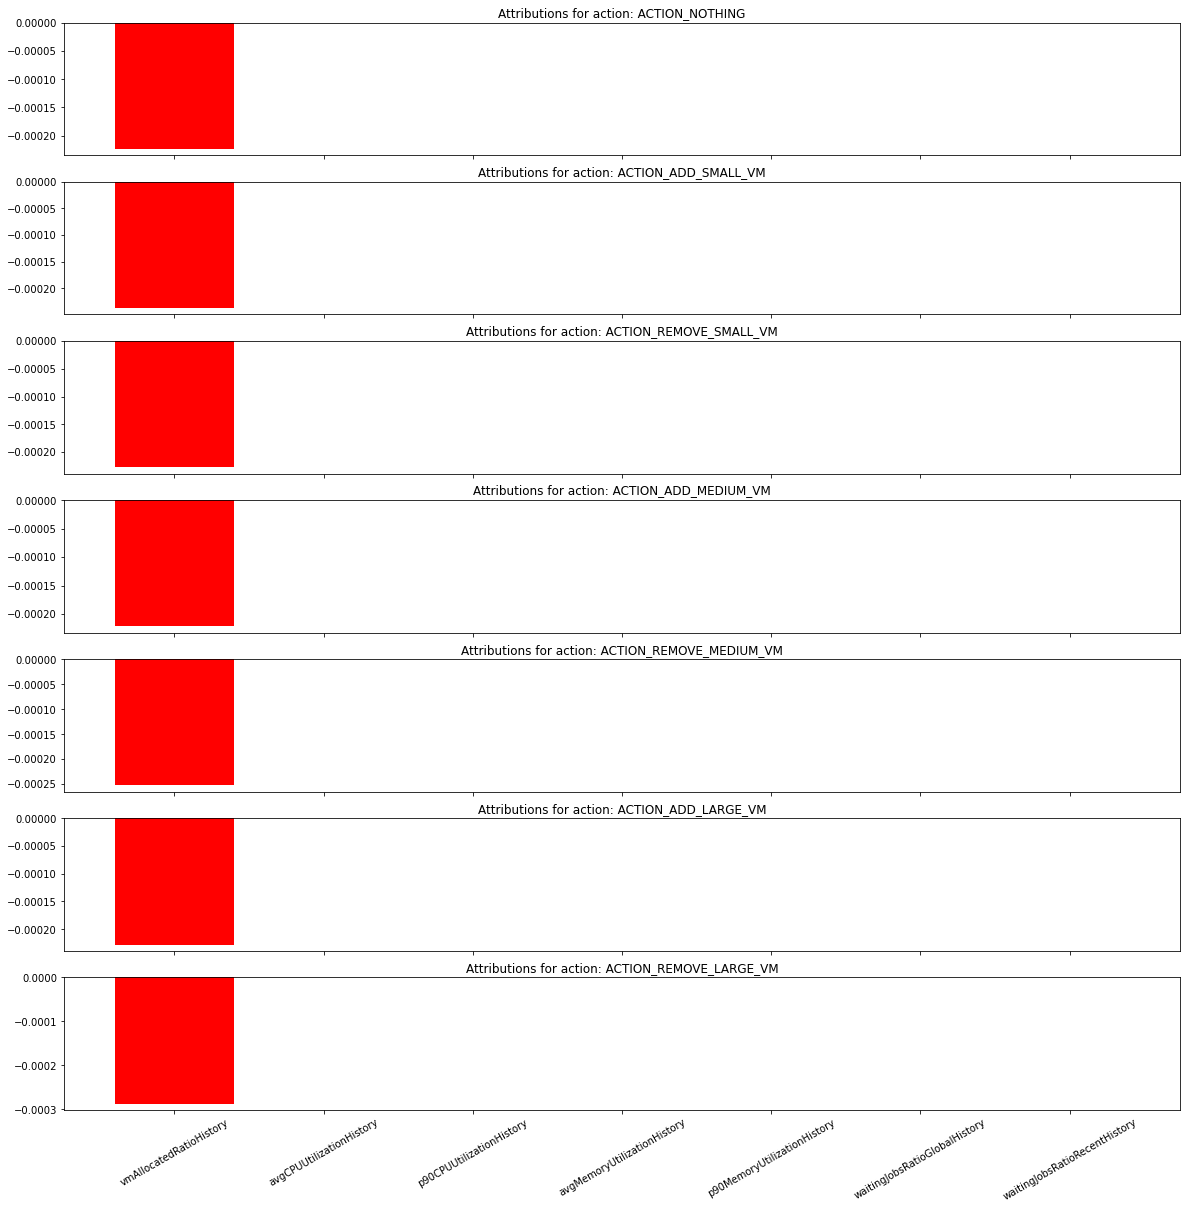

In [31]:
ig_attributor.explain_example(idx=450)

In [13]:
X_manual = torch.Tensor([
    [[0, 1, 1, 1, 1, 1, 1]],
    [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ])

In [14]:
X_manual.shape

torch.Size([3, 1, 7])

In [15]:
ig_attributor = IGAttributor(net=dqn_net,
                             agent='dqn',
                             policy='mlp',
                             data=X_manual)

torch.Size([3, 1, 7])


Action made: ACTION_REMOVE_SMALL_VM
Q-values:
ACTION_NOTHING: -3.0198349952697754
ACTION_ADD_SMALL_VM: -3.040006160736084
ACTION_REMOVE_SMALL_VM: -2.9564292430877686
ACTION_ADD_MEDIUM_VM: -3.048706293106079
ACTION_REMOVE_MEDIUM_VM: -3.090357542037964
ACTION_ADD_LARGE_VM: -3.1040754318237305
ACTION_REMOVE_LARGE_VM: -3.0800044536590576


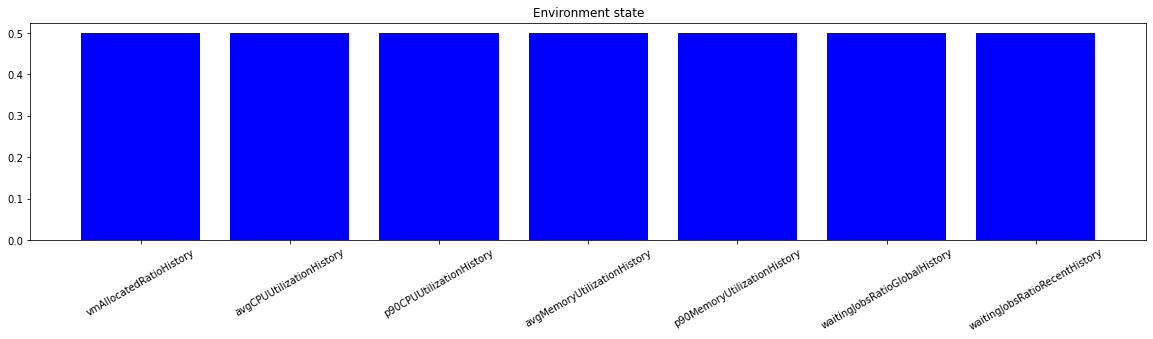

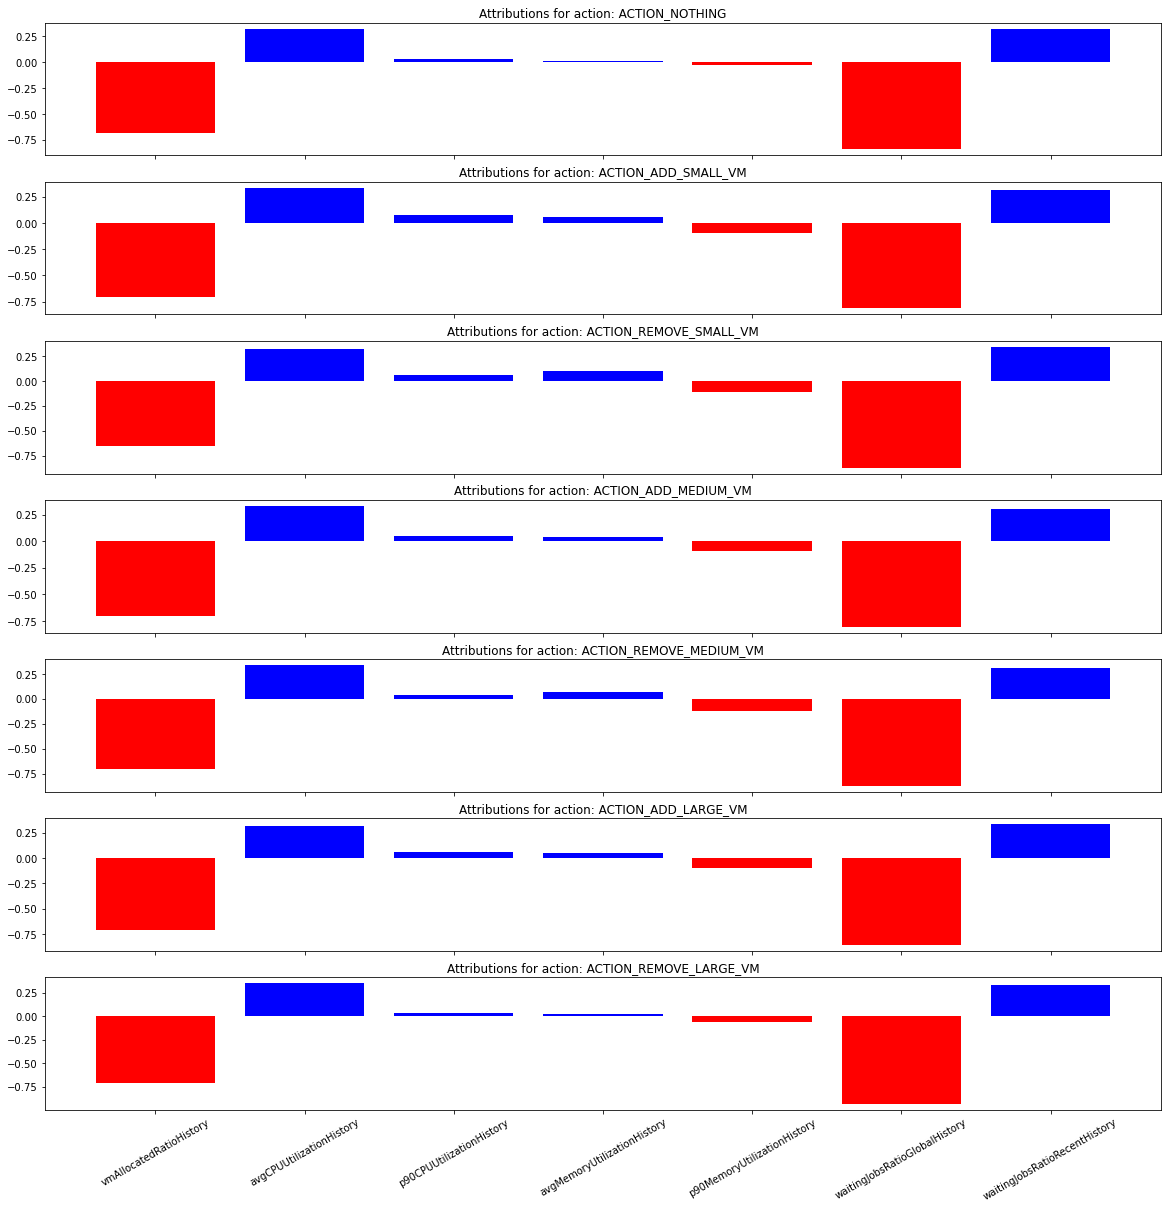

In [16]:
ig_attributor.explain_example(idx=1)